In [31]:
from math import sqrt
from datetime import datetime
import datetime as dt
import random
from scipy.spatial import distance
import numpy as np
import pandas as pd
import math
from numpy import concatenate
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [32]:
# Datayı Yükleyelim
path = r'c:\sxk96j_2_6ay.xlsx'
data = pd.read_excel(path, date_format=[0])
# İlk 5 Satır
data.head()

DATE_TIME  MAXIMUM_SPEED  MINIMUM_SPEED  AVERAGE_SPEED  \
0 2022-06-01 00:00:00            137              6             65   
1 2022-06-01 01:00:00            129              7             66   
2 2022-06-01 02:00:00            120              6             66   
3 2022-06-01 03:00:00            111              7             64   
4 2022-06-01 04:00:00            127              6             63   

   NUMBER_OF_VEHICLES  
0                 279  
1                 196  
2                 142  
3                 109  
4                  99

In [33]:
#Datetime Haline Getirilmesi
data['DATE_TIME'] = pd.to_datetime(data.DATE_TIME, format='%Y-%m-%d %H:%M')
#İndex'e Alınması
data.index = data.DATE_TIME

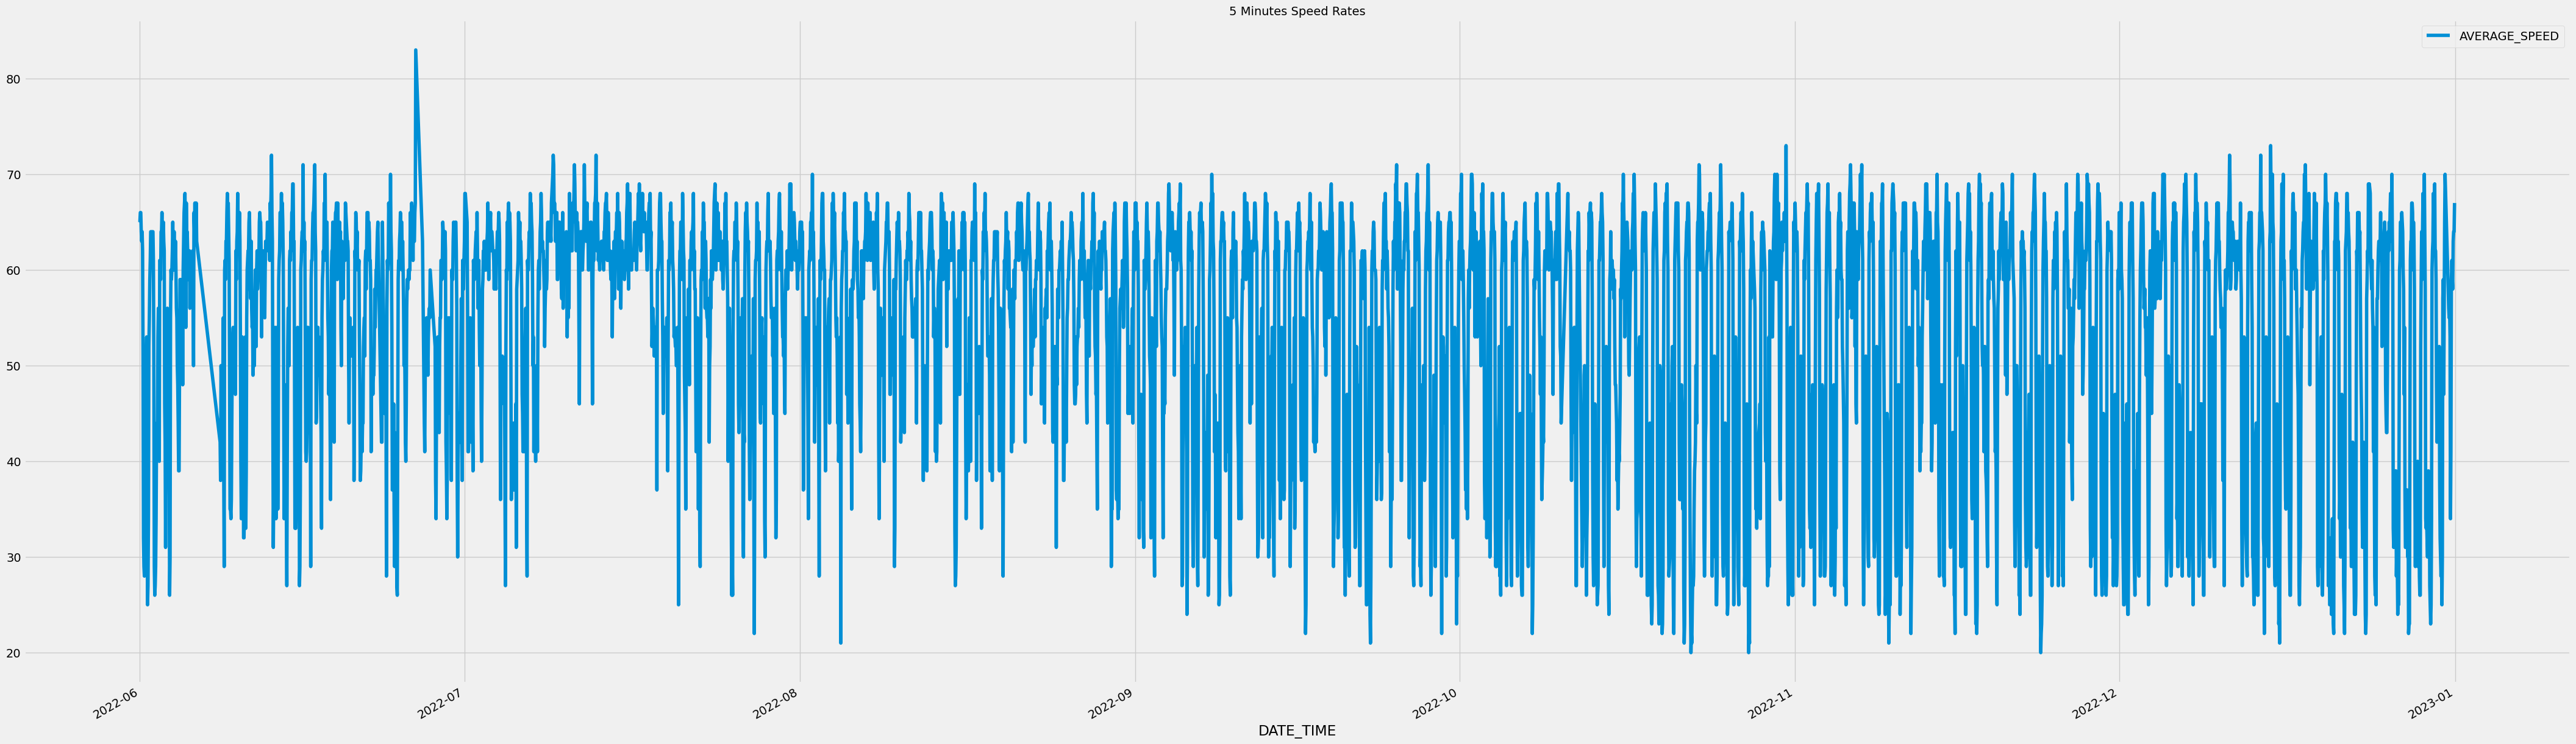

In [34]:
fig = plt.figure(figsize=(48,16))
data.AVERAGE_SPEED.plot(label='AVERAGE_SPEED')
plt.legend(loc='best')
plt.title('5 Minutes Speed Rates', fontsize=14)
plt.show()

In [35]:
values = data['AVERAGE_SPEED'].values.reshape(-1,1)
values = values.astype('float32')

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(values)

In [37]:
# %60 Train % 40 Test
TRAIN_SIZE = 0.60
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Veri Seti Sayıları (training set, test set): " + str((len(train), len(test))))
#dataset[train_size:len(dataset)]

Veri Seti Sayıları (training set, test set): (2998, 2000)


In [38]:
def create_datasetMultiSteps(dataset, n_steps_out, window_size):
        dataX, dataY = [], []
        tot = window_size + n_steps_out - 1
        for i in range(int((len(dataset) - tot))):
                start_a = i
                end_a = start_a + window_size
                start_b = end_a
                end_b = end_a + n_steps_out
                a = dataset[start_a:end_a, 0]
                b = dataset[start_b:end_b, 0]
                dataX.append(a)
                dataY.append(b)
        return np.array(dataX), np.array(dataY)

In [39]:
# Verisetlerimizi Oluşturalım
window_size = 6
n_steps_out = 3
train_X, train_Y = create_datasetMultiSteps(train,n_steps_out, window_size)
test_X, test_Y = create_datasetMultiSteps(test,n_steps_out, window_size)
print("Original training data shape:")
print(train_Y.shape)

Original training data shape:
(2990, 3)


In [40]:
# define the fi function to construct the fi matrix 
def fi(x,cListe,sigmaListe):
    fimatris = []
    for i in range(0, fi_n):
        fimatris += [np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2))]
    fimatris = np.array(fimatris)
    return (fimatris)

# derivative of fi-c-matris
def derivfic(x,cListe,sigmaListe):
    derivficmatris = []
    for i in range(0, fi_n):
        derivficmatris += [((x - cListe[1][i, :]) / (sigmaListe[1][0, i] ** 2)) * (
            np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2)))]
    derivficmatris = np.array(derivficmatris)
    return (derivficmatris)

# derivative of fi-sigma
def derivfisigma(x,cListe,sigmaListe):
    derivfimatris = []
    for i in range(0, fi_n):
        derivfimatris += [((distance.euclidean(x, cListe[1][i, :])) ** 2) / sigmaListe[1][0, i] ** 3 * (
            np.exp(-((distance.euclidean(x, cListe[1][i, :])) ** 2) / (2 * sigmaListe[1][0, i] ** 2)))]
    derivfimatris = np.array(derivfimatris)
    return (derivfimatris)

# define the Wturet function to calculate weight matrix
def Wturet(w1,delta_1):
    Wturet = []
    turet = np.dot(w1.T, delta_1)
    for i in range(0, Inputcolumn):
        Wturet += [turet]
    Wturet = np.array(Wturet)
    return ((Wturet.T).reshape(fi_n, Inputcolumn))



In [41]:
def sigmoid_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev sigmoid
      f = 1 / (1 + np.exp(- 0.25*x)) * (1 - 1 / (1 + np.exp(- 0.25*x)))
   else:  # sigmoid
      f = 1 / (1 + np.exp(- 0.25*x))

   return f


def tanh_act(x, der=False):
   import numpy as np

   if (der == True):  # Turev tanh
      f = 1 - np.square(((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x))))
   else:
      f = ((np.exp(x)) - (np.exp(-x))) / ((np.exp(x)) + (np.exp(-x)))

   return f

def Lineer_act(x, der=False):
   import numpy as np

   if (der == True):  # the derivative of the ReLU is the Heaviside Theta
      f = 1
   else:
      f = x

   return f




In [42]:
Inputmatrix = train_X
Inputcolumn = Inputmatrix.shape[1]
Inputrow = Inputmatrix.shape[0]
train_Y = train_Y.reshape(-1,n_steps_out)
Outputmatrix = train_Y
Outputcolumn = Outputmatrix.shape[1]
Outputrow = Outputmatrix.shape[0]


Inputtestmatrix = test_X
Inputtestcolumn = Inputtestmatrix.shape[1]
Inputtestrow = Inputtestmatrix.shape[0]
test_Y = test_Y.reshape(-1,n_steps_out)
Outputmatrixtest = test_Y
Outputtestcolumn = Outputmatrixtest.shape[1]
Outputtestrow = Outputmatrixtest.shape[0]

In [43]:

# define the number of neuron
fi_n = Inputcolumn - 2

# define the alpha value for momentum term
alfa = 0.07


# define necessary variables
E_iterasyon = []
E_iterasyon_test = []
EgitimSure = []

itrsayisi = 400


In [44]:
p = 30  # Gizli Katman 1 neron sayisi
q = 20  # Gizli Katman 2 neron sayisi
r = n_steps_out    # Cikis Katmani neron sayisi

eta = 1 / 100        # Learning rate
alpha = 1 / 300      # Momentum

w10 = np.zeros((p, fi_n))              # (k-1) 1. Katman Agirlik Degerleri - momentum icin.
w11 = 0.25 * np.random.randn(p, fi_n)  # 1. Katman Agirlik Degerleri
b1 = 0.25 * np.random.randn(p)

w20 = np.zeros((q, p))                          # (k-1) 2. Katman Agirlik Degerleri - momentum icin.
w21 = 0.25 * np.random.randn(q, p)              # 2. Katman Agirlik Degerleri
b2 = 0.25 * np.random.randn(q)

wOut0 = np.zeros((r, q))                        # (k-1) Cikis Katmani Agirlik Degerleri - momentum icin.
wOut1 = 0.25 * np.random.randn(r, q)            # Cikis Katmani Agirlik Degerleri
bOut = 0.25 * np.random.randn(r)

act = tanh_act
act_1 = tanh_act
act_2 = Lineer_act

E_ani_max = []
E_ort = []


In [45]:

n1 = dt.datetime.now()
    # define the matrix consisting of c vectors
ceski = [[round(random.uniform(0.1, 0.9), 2) for x in range(Inputcolumn)] for y in range(fi_n)]
cyeni = [[round(random.uniform(0.1, 0.9), 2) for x in range(Inputcolumn)] for y in range(fi_n)]
cListe = [np.array(ceski), np.array(cyeni)]

    # define the array containing the sigma values
sigmaeski = [[round(random.uniform(1.5, 4.5), 2) for x in range(fi_n)] for y in range(1)]
sigmayeni = [[round(random.uniform(1.5, 4.5), 2) for x in range(fi_n)] for y in range(1)]
sigmaListe = [np.array(sigmaeski), np.array(sigmayeni)]

    # create weight matrices that will be used for the momentum term
Weski = [[round(random.uniform(0.01, 0.25), 2) for x in range(fi_n)] for y in range(Outputcolumn)]
Wyeni = [[round(random.uniform(0.01, 0.25), 2) for x in range(fi_n)] for y in range(Outputcolumn)]
WListe = [np.array(Weski), np.array(Wyeni)]

E = []
W_son = []
E_ort = []
E_ani_max = []

In [46]:
# Training phase:
for j in range(0, itrsayisi):

        # define step sizes to update weights
        adimbuyuklugu = 0.020  #- j * (0.060 / itrsayisi)

        E_ani = []
        
        for i in range(0, Inputrow):
            # calculate output value 
            Y = fi(Inputmatrix[i, :],cListe,sigmaListe)
            
        # 2: Feed forward
            w1 = w11
            v1 = np.dot(w1, Y) + b1
            yl1 = act_1(v1)      
            
            w2 = w21
            v2 = np.dot(w2, yl1) + b2
            yl2 = act_1(v2)  # 2. Katman Cikisi     y2: Gercek cikis olduğundan farklı olsun diye yl2 yazildi.
            
            wOut = wOut1
            v_o = np.dot(wOut, yl2) + bOut
            y = Lineer_act(v_o)  # Cikis Katmani Cikisi

            e = train_Y[i] - y
            
           # 2.2: Cikis Katmani Yerel Gradyen
            delta_Out = e * Lineer_act(v_o, der=True)

           # 2.3: Backpropagate
            delta_2 = np.dot(delta_Out, wOut) * act_1(v2, der=True)  # 2. Katman Yerel Gradyen
            delta_1 = np.dot(delta_2, w2) * act_1(v1, der=True)      # 1. Katman Yerel Gradyen

           # 3: Gradient descent
            wOut = wOut1 + eta * np.outer(delta_Out, yl2) + alpha * (wOut1 - wOut0)  # Cikis Katmani Agirlik güncelleme
            wOut0 = wOut1
            wOut1 = wOut
            bOut = bOut + eta * delta_Out

            w2 = w21 + eta * np.outer(delta_2, yl1) + alpha * (w21 - w20)  # Gizli Katman 2 Agirlik güncelleme
            w20 = w21
            w21 = w2
            b2 = b2 + eta * delta_2

            w1 = w11 + eta * np.outer(delta_1, Y) + alpha * (w11 - w10)  # Gizli Katman 1 Agirlik güncelleme
            w10 = w11
            w11 = w1
            b1 = b1 + eta * delta_1

            
                        
            # keep the weights before update
            W_tut = WListe[1]
            c_tut = cListe[1]
            sigma_tut = sigmaListe[1]
            
            # keep updated weights as second item of list
            #WListe[1] = WListe[1] + adimbuyuklugu * np.dot(e.reshape(Outputcolumn, 1),
            #                                               fi(Inputmatrix[i, :],cListe,sigmaListe).reshape(1, fi_n)) + alfa * (
            #                        WListe[1] - WListe[0])
            
            cListe[1] = cListe[1] + adimbuyuklugu * Wturet(w1,delta_1) * derivfic(Inputmatrix[i, :],cListe,sigmaListe) + alfa * (
                        cListe[1] - cListe[0])
            sigmaListe[1] = sigmaListe[1] + adimbuyuklugu * np.dot(w1.T, delta_1) * (
                derivfisigma(Inputmatrix[i, :],cListe,sigmaListe).reshape(fi_n, 1)) + alfa * (sigmaListe[1] - sigmaListe[0])
            
            # keep the weights of one step before as the first item in the list
            WListe[0] = W_tut
            cListe[0] = c_tut
            sigmaListe[0] = sigma_tut
            
            # 4. loss function Hesaplama
    
            E_ani.append(0.5 * np.dot(e.T, e))
        E_ort.append((1 / np.size(train_X, 0)) * sum(E_ani))
        E_ani_max.append(max(E_ani))
    
        if j >= 21:
           if abs((E_ort[j - 1]) - (E_ort[j])) <= 0.000000001 or (E_ort[j]) - (E_ort[j - 20]) >  0.05:
             print("E_ort_degisim=",(E_ort[j - 20]) - (E_ort[j]))
             break
print("j=",j)
        

    # keep the latest updated weight matrix
if len(W_son) == 0:
    W_son = np.array(WListe[1])
    c_son = np.array(cListe[1])
    sigma_son = np.array(sigmaListe[1])

n2 = dt.datetime.now()


j= 399


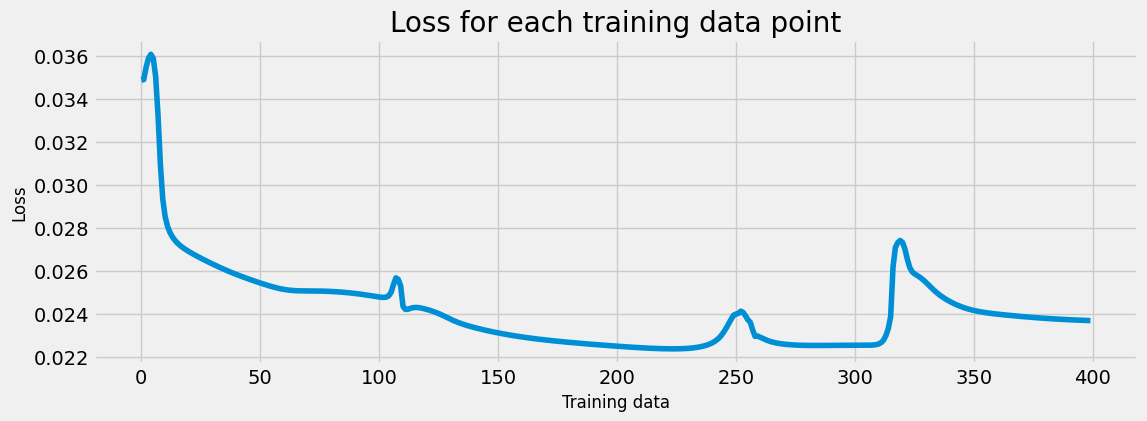

In [47]:
      
      # 5. Her Iterasyon icin hatayi cizdiriyoruz

plt.figure(figsize=(12, 4))
plt.plot(E_ort)
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.show()


In [48]:
EgitimSure.append(n2-n1)
EgitimSure

[datetime.timedelta(seconds=461, microseconds=403082)]

In [49]:
E_ani_train = []
y_train_pred =[]
E_ani_test = []
y_test_pred = []

In [50]:
 # Train predict phase:
for i in range(0, Inputrow):
        # calculate output value 
        Ytrain = fi(Inputmatrix[i, :],cListe,sigmaListe)
        v1_tr = np.dot(w1, Ytrain) + b1
        y1_tr = act_1(v1_tr)  # 1. Katman Cikisi

        v2_tr = np.dot(w2, y1_tr) + b2
        y2_tr = act_1(v2_tr)  # 2. Katman Cikisi

        v_otr = np.dot(wOut, y2_tr) + bOut
        y_tr = Lineer_act(v_otr)  # Cikis Katmani Cikisi
        e_tr = train_Y[i] - y_tr
        
        y_train_pred.append(y_tr)
              

In [51]:
 # Test predict phase:
for i in range(0, Inputtestrow):
        # calculate output value 
        Ytest = fi(Inputtestmatrix[i, :],cListe,sigmaListe)
        v1_t = np.dot(w1, Ytest) + b1
        y1_t = act_1(v1_t)  # 1. Katman Cikisi

        v2_t = np.dot(w2, y1_t) + b2
        y2_t = act_1(v2_t)  # 2. Katman Cikisi

        v_ot = np.dot(wOut, y2_t) + bOut
        y_t = Lineer_act(v_ot)  # Cikis Katmani Cikisi
        e_t = test_Y[i] - y_t
    
        y_test_pred.append(y_t)
        

In [52]:
y_test = test_Y.reshape(-1,n_steps_out)
x_test = test_X
y_train = train_Y.reshape(-1,n_steps_out)
x_train = train_X

In [53]:
# Scaling the predictions
y_train_pred = (scaler.inverse_transform(y_train_pred)).reshape(-1,n_steps_out)
y_test_pred = (scaler.inverse_transform(y_test_pred)).reshape(-1,n_steps_out)
# Scaling the original values
y_train = scaler.inverse_transform(y_train)
y_test = scaler.inverse_transform(y_test)

In [54]:
score_tr = math.sqrt(mean_squared_error(y_train, y_train_pred))
print("Train data score: %.2f RMSE" % score_tr)

score_t = math.sqrt(mean_squared_error(y_test, y_test_pred))
print("Test data score: %.2f RMSE" % score_t)

Train data score: 13.16 RMSE
Test data score: 12.32 RMSE


In [55]:
from sklearn.metrics import mean_absolute_percentage_error

error_mape_tr = 100*mean_absolute_percentage_error(y_train, y_train_pred)
print("Train data score: %.2f MAPE" % error_mape_tr)

error_mape_t = 100*mean_absolute_percentage_error(y_test, y_test_pred)
print("Test data score: %.2f MAPE" % error_mape_t)
error_mape_t0 = 100*mean_absolute_percentage_error(y_test[:,0], y_test_pred[:,0])
print("Test t zamanı score: %.2f MAPE" % error_mape_t0)
error_mape_t1 = 100*mean_absolute_percentage_error(y_test[:,1], y_test_pred[:,1])
print("Test t+1 zamanı score: %.2f MAPE" % error_mape_t1)
error_mape_t2 = 100*mean_absolute_percentage_error(y_test[:,2], y_test_pred[:,2])
print("Test t+2 zamanı score: %.2f MAPE" % error_mape_t2)


Train data score: 21.12 MAPE
Test data score: 23.41 MAPE
Test t zamanı score: 18.91 MAPE
Test t+1 zamanı score: 23.90 MAPE
Test t+2 zamanı score: 27.43 MAPE


In [56]:
mdape_tr = np.median((np.abs(np.subtract(y_train, y_train_pred)/ y_train))) * 100
print("Train data score: %.2f MdAPE" % mdape_tr)

mdape_t = np.median((np.abs(np.subtract(y_test, y_test_pred)/ y_test))) * 100
print("Test data score: %.2f MdAPE" % mdape_t)

Train data score: 21.79 MdAPE
Test data score: 20.20 MdAPE


In [57]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

error_smape_tr = smape(y_train,y_train_pred)
print("Train data score: %.2f SMAPE" % error_smape_tr)

error_smape_t = smape(y_test,y_test_pred)
print("Test data score: %.2f SMAPE" % np.mean(error_smape_t))

Train data score: 69.14 SMAPE
Test data score: 67.79 SMAPE


In [58]:
from sklearn.metrics import mean_absolute_error
e_tr = y_train - y_train_pred
scale = mean_absolute_error(y_train[1:], y_train[:-1])
mase_tr = np.mean(np.abs(e_tr / scale))
print("Train data score: %.2f MASE" % mase_tr)

e_t = y_test - y_test_pred
scale = mean_absolute_error(y_test[1:], y_test[:-1])
mase_t = np.mean(np.abs(e_t / scale))
print("Test data score: %.2f MASE" % mase_t)

Train data score: 2.56 MASE
Test data score: 1.91 MASE


In [59]:
train_y=y_train
pred_train_y=y_train_pred
test_y=y_test
pred_test_y=y_test_pred

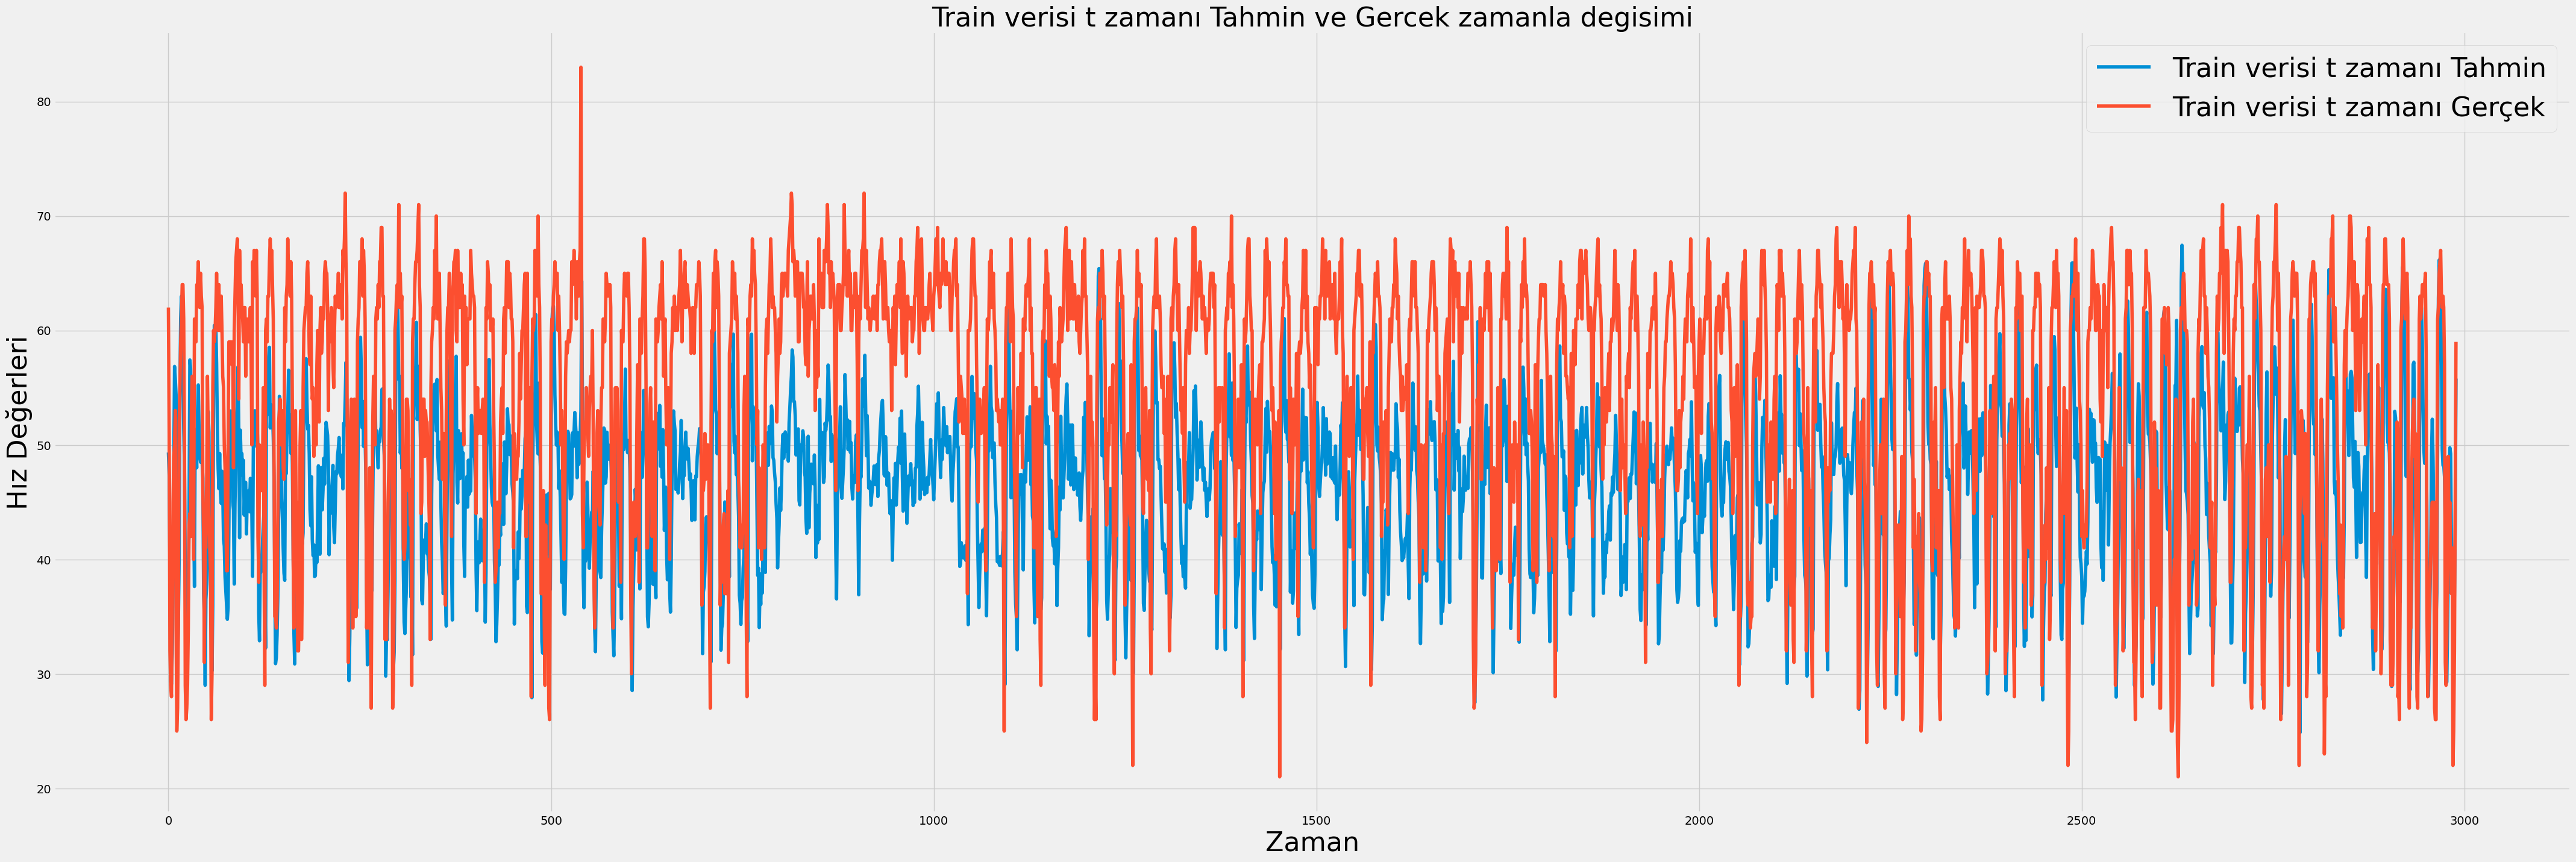

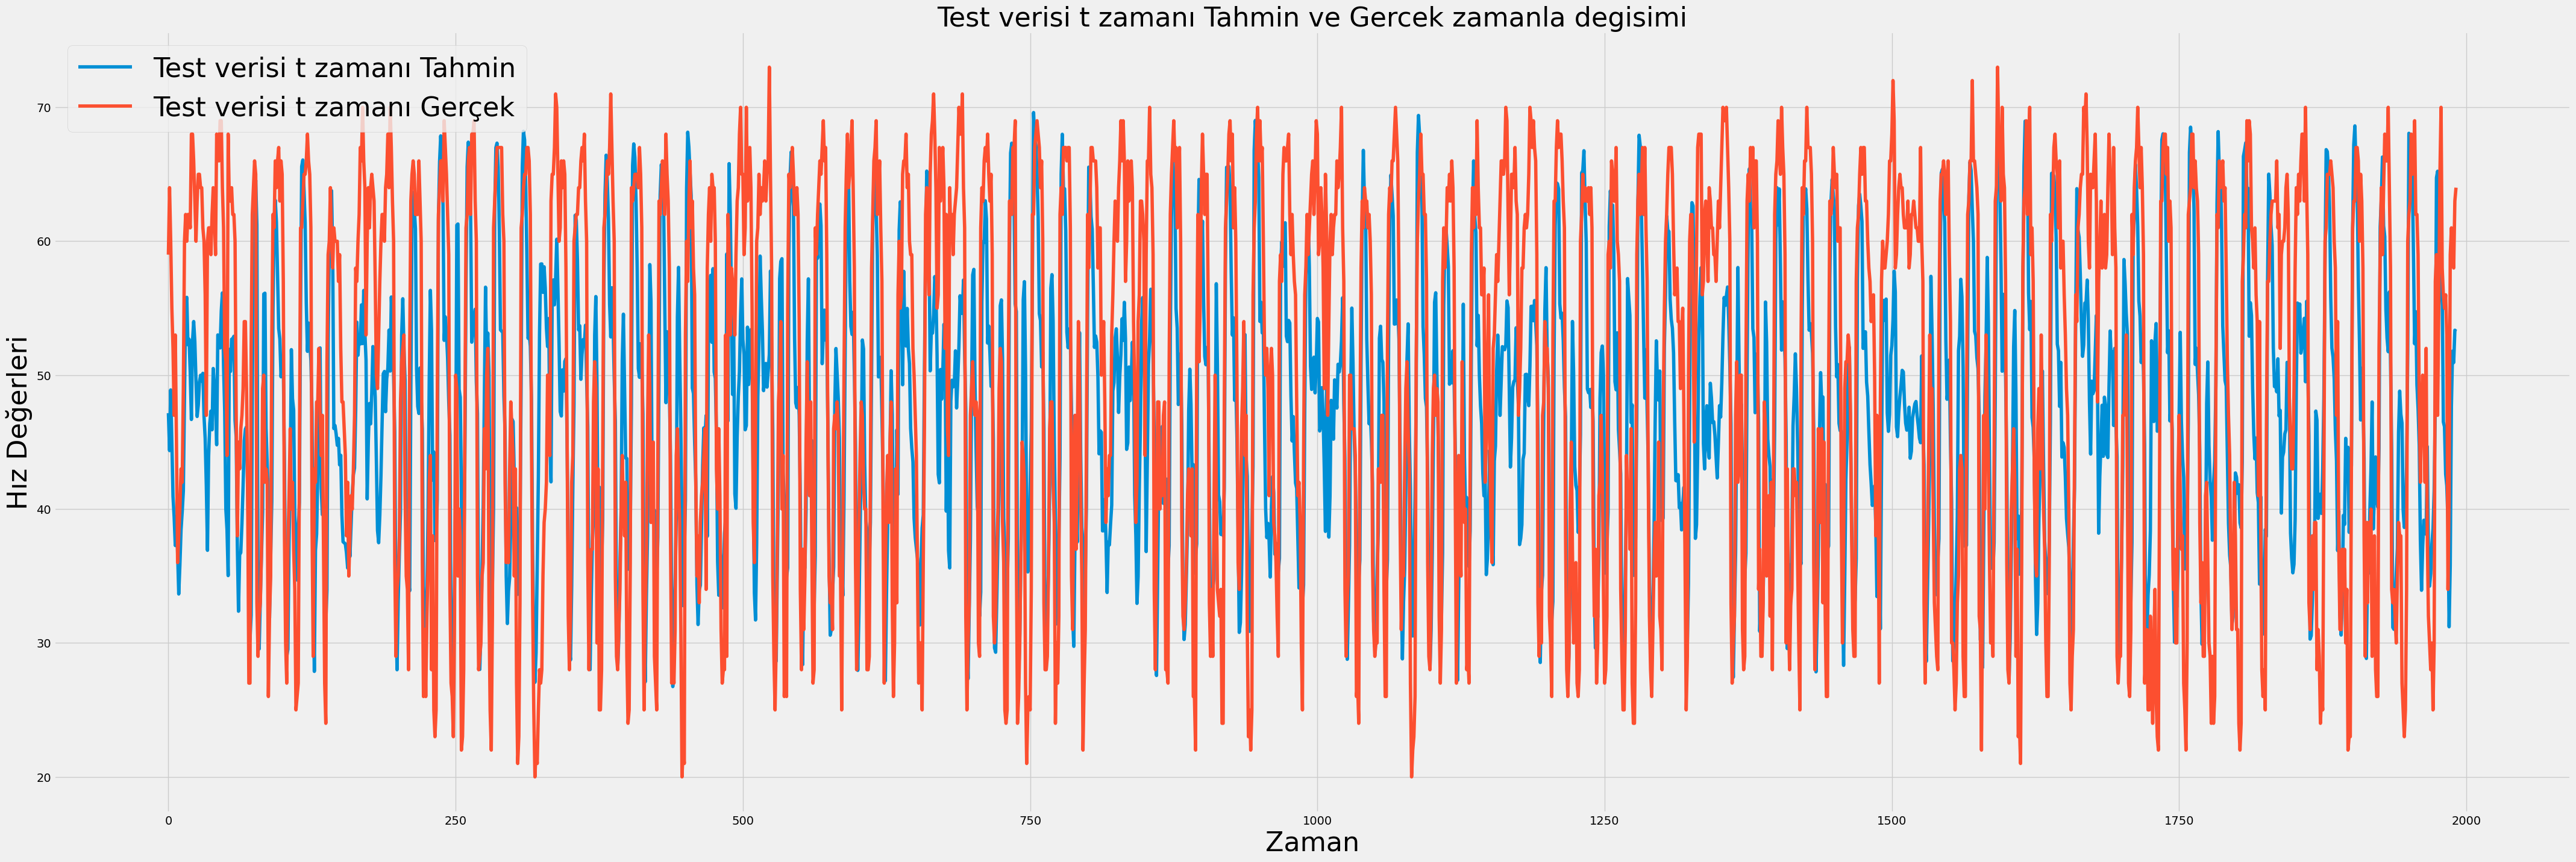

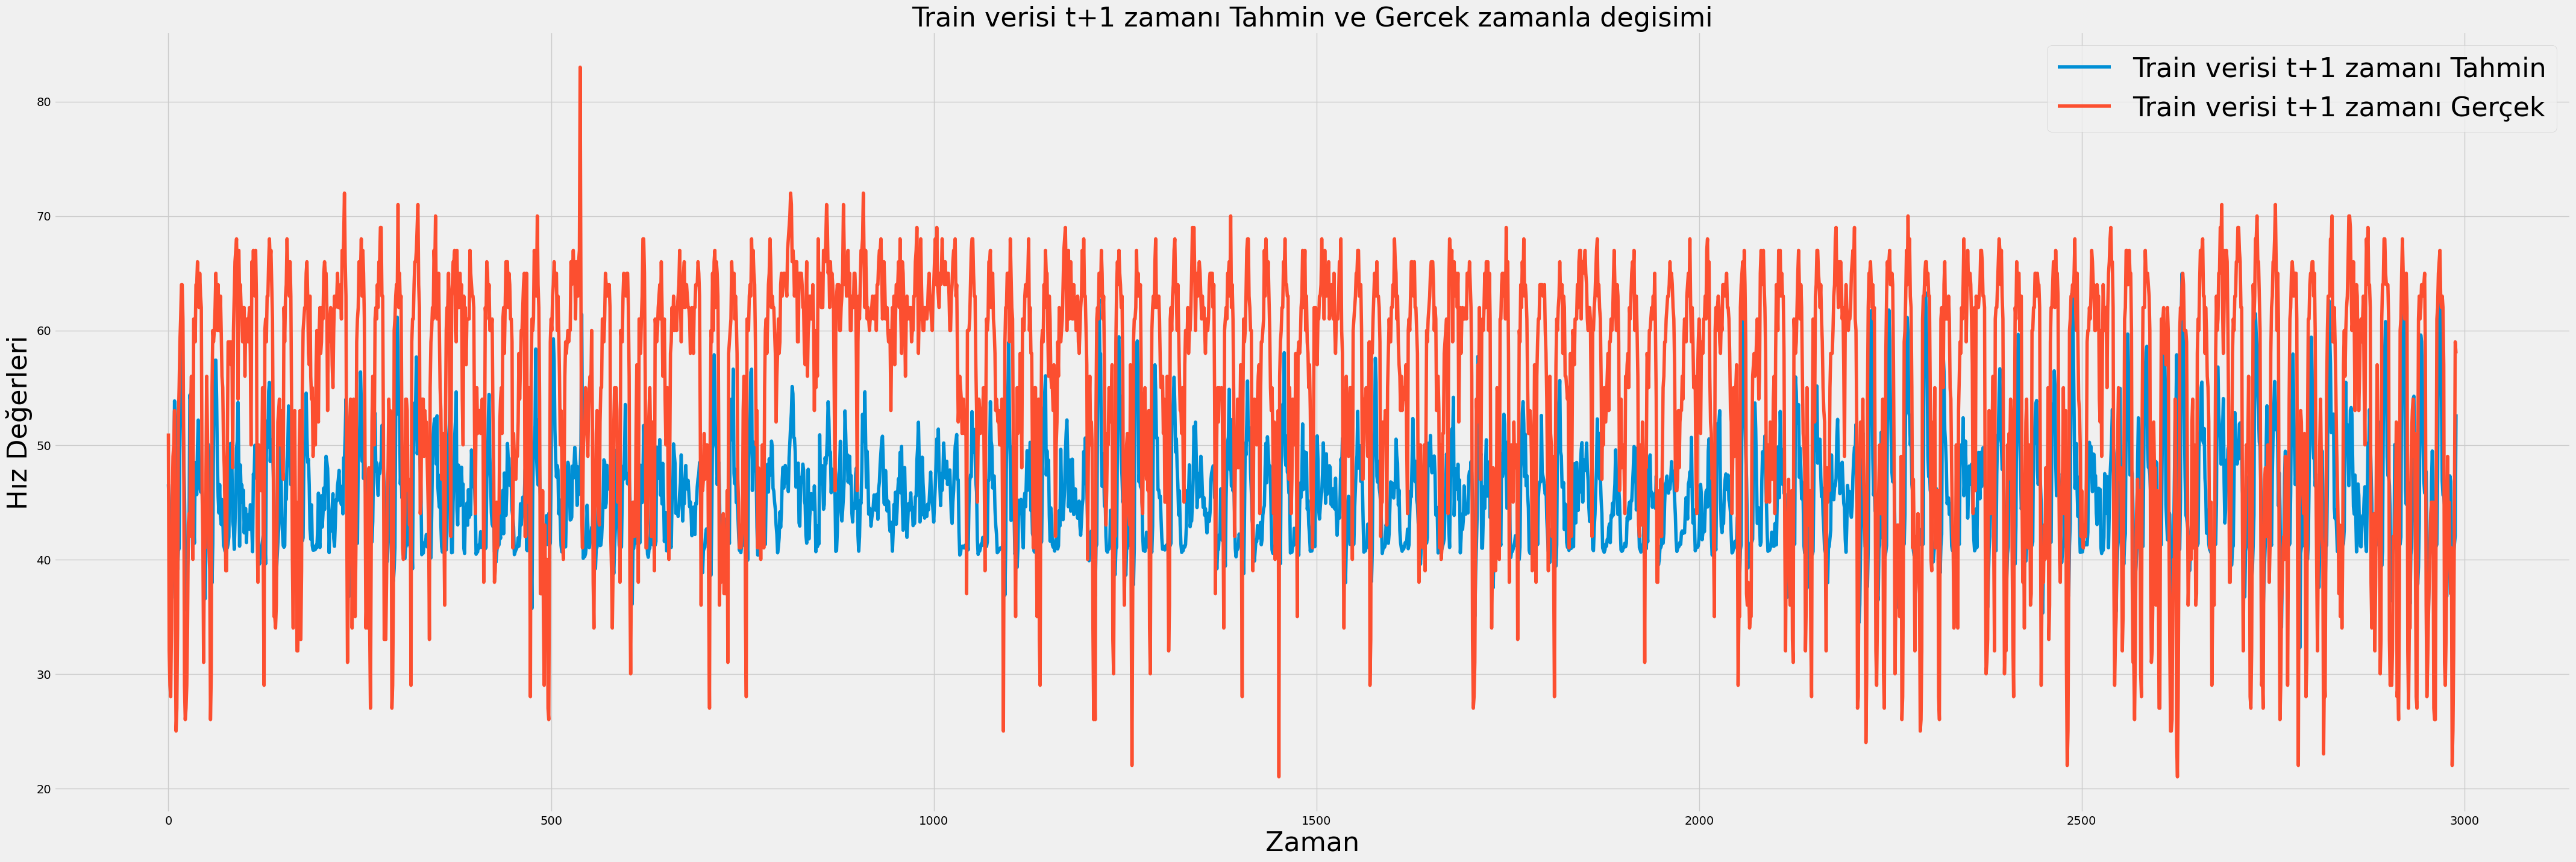

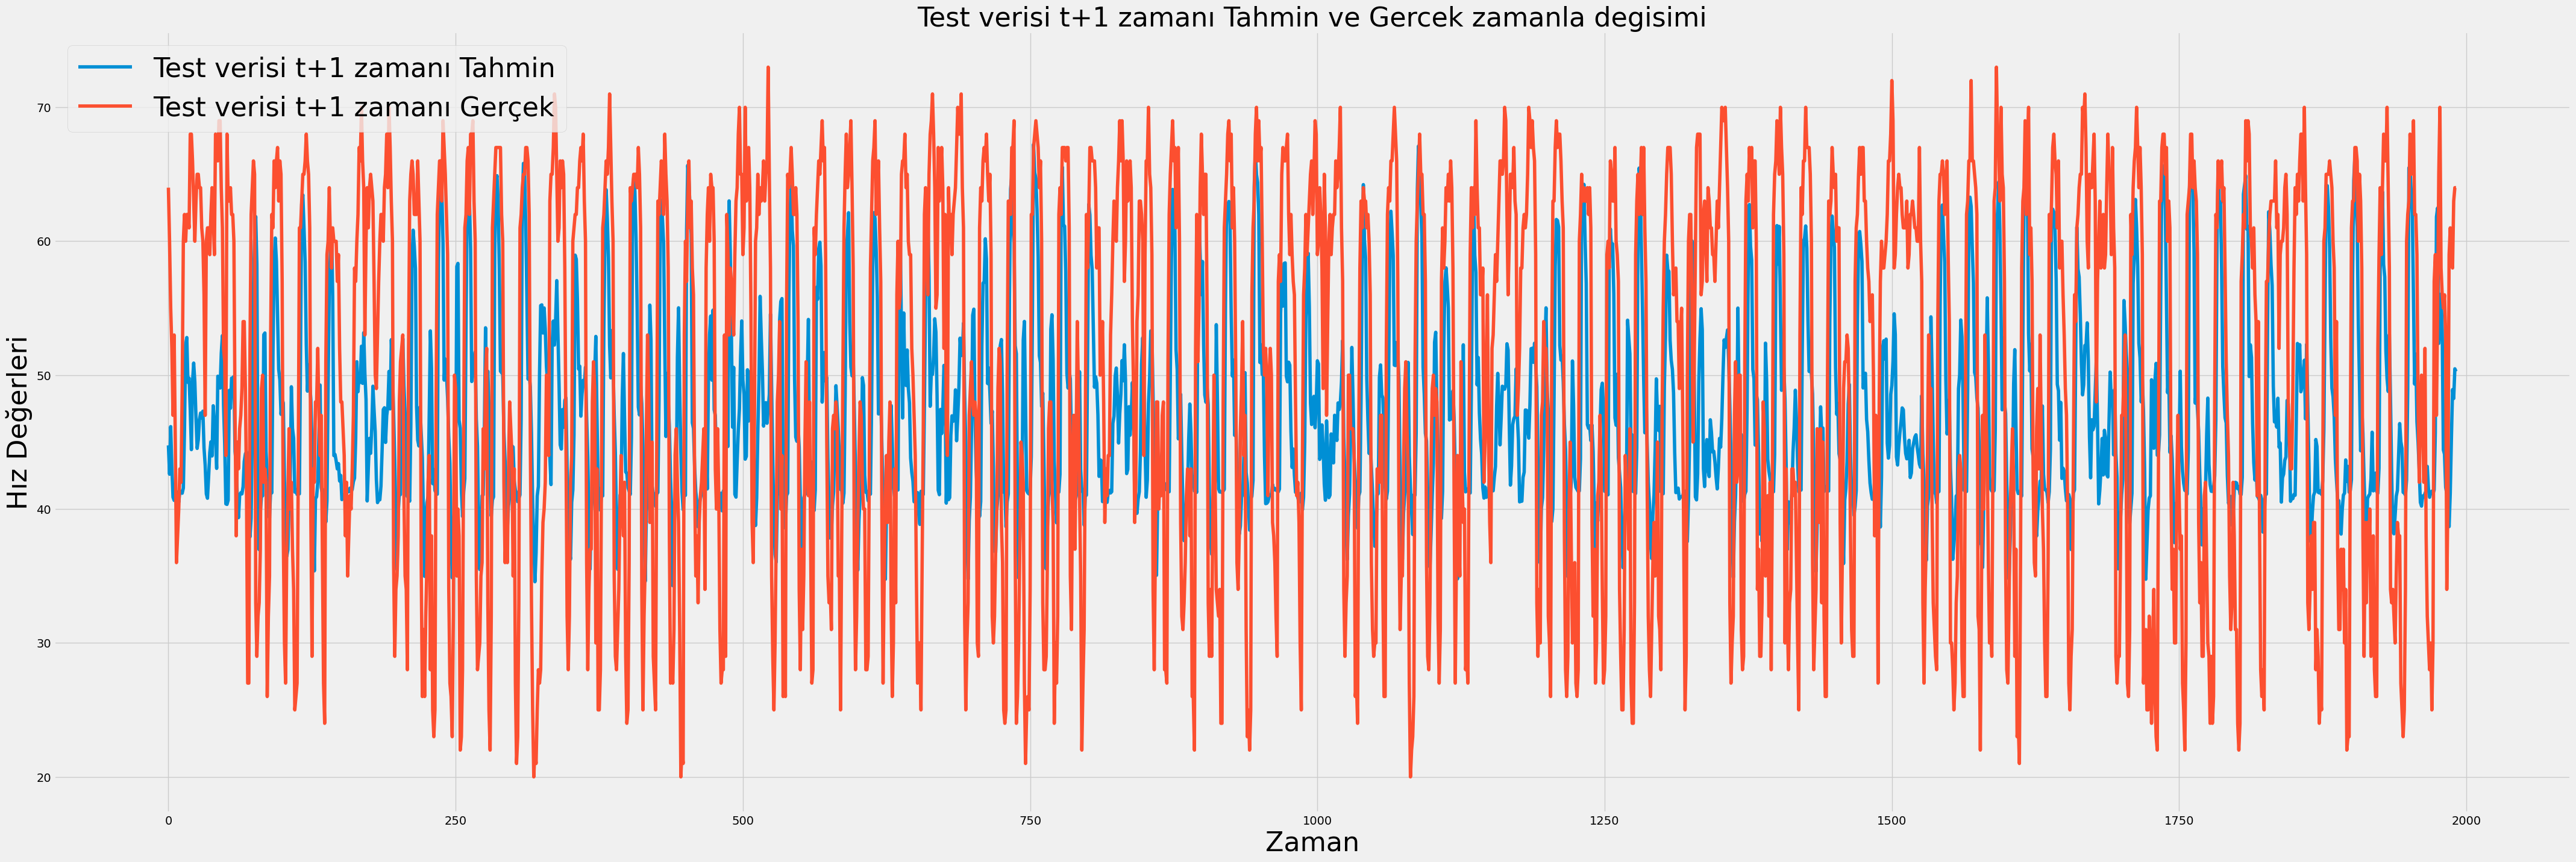

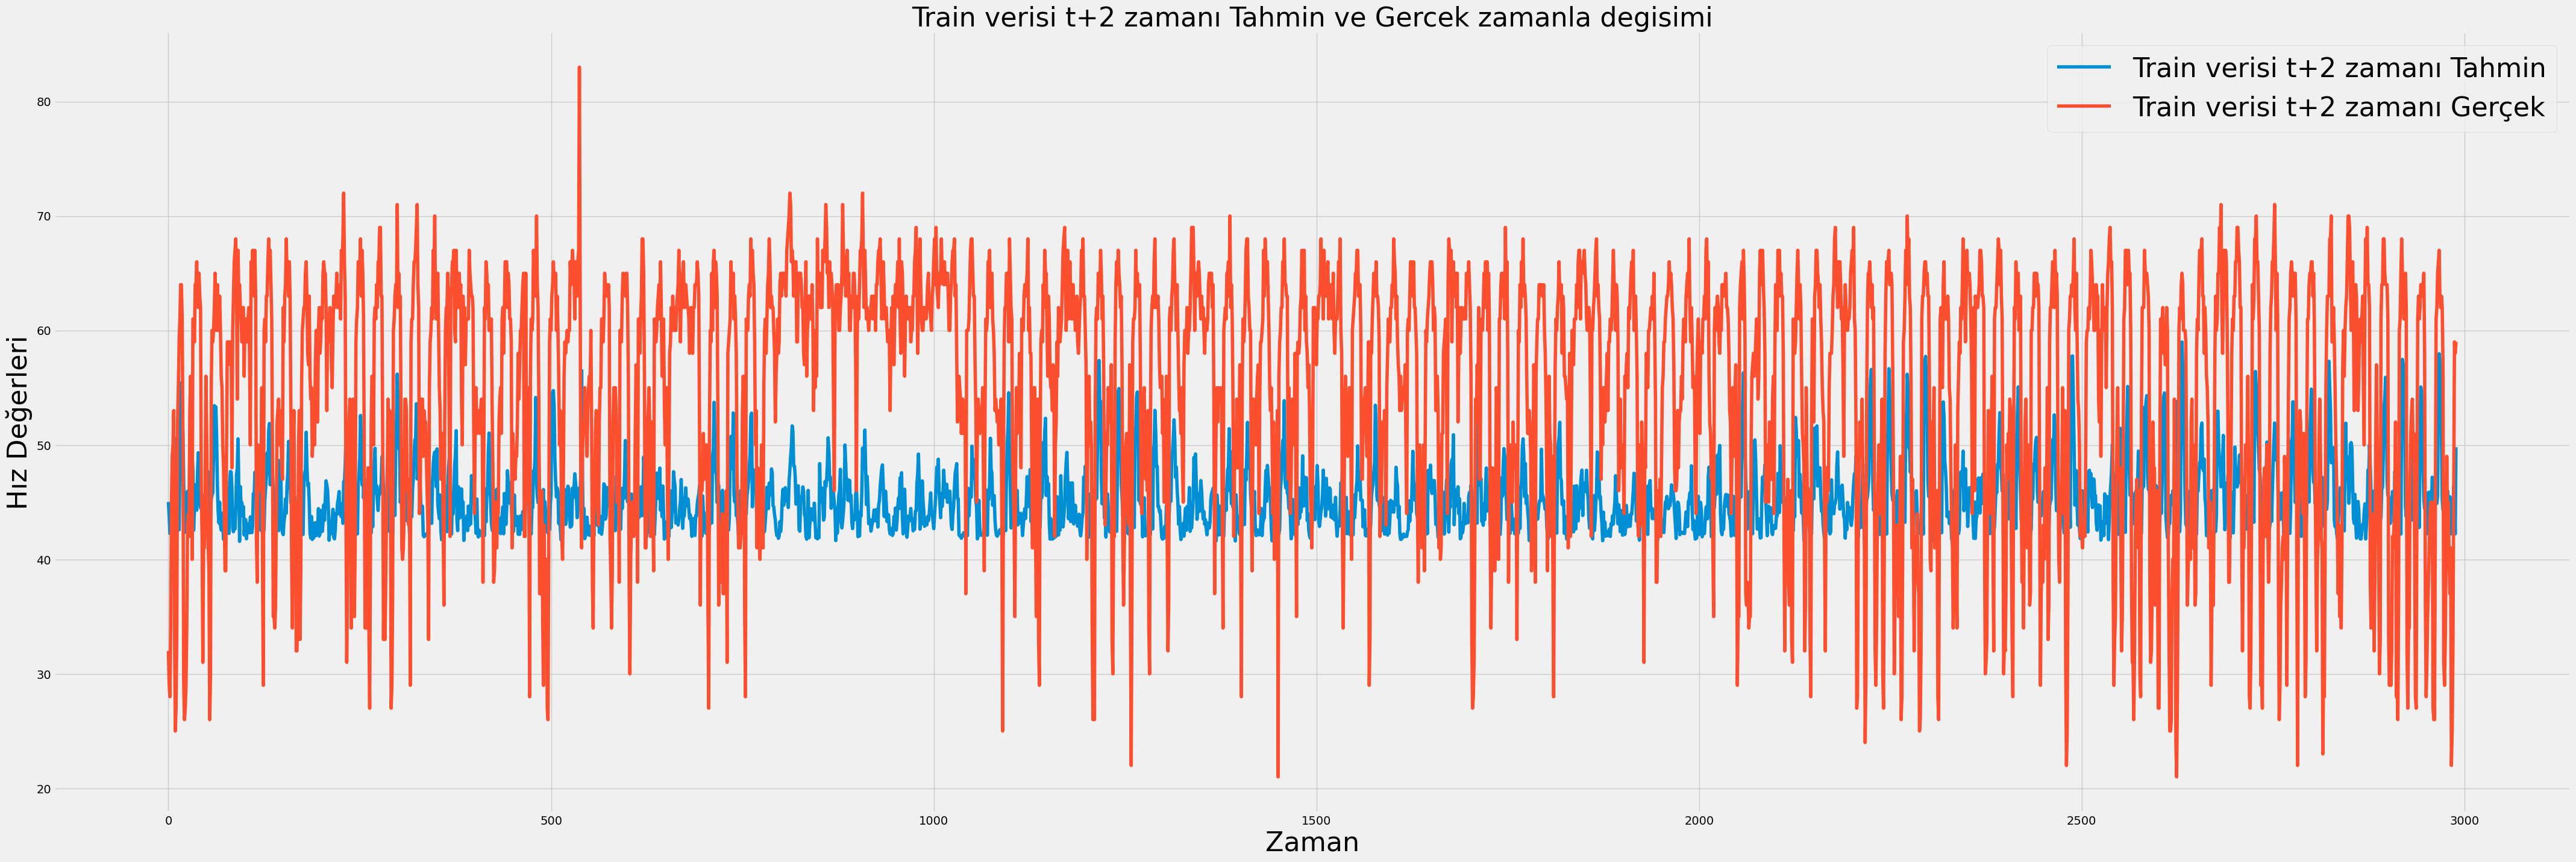

In [60]:
# 10. Test Veri Seti icin Ag sonucu ve verili cikislari cizdiriyoruz

train_y1=train_y[:,0]
pred_train_y1=pred_train_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y1, label = "Train verisi t zamanı Tahmin")
plt.plot(train_y1, label = "Train verisi t zamanı Gerçek")
plt.title('Train verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

test_y1=test_y[:,0]
pred_test_y1=pred_test_y[:,0]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y1, label = "Test verisi t zamanı Tahmin")
plt.plot(test_y1, label = "Test verisi t zamanı Gerçek")
plt.title('Test verisi t zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y2=train_y[:,1]
pred_train_y2=pred_train_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y2, label = "Train verisi t+1 zamanı Tahmin")
plt.plot(train_y2, label = "Train verisi t+1 zamanı Gerçek")
plt.title('Train verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')


test_y2=test_y[:,1]
pred_test_y2=pred_test_y[:,1]
plt.figure(figsize=(48, 16))
plt.plot(pred_test_y2, label = "Test verisi t+1 zamanı Tahmin")
plt.plot(test_y2, label = "Test verisi t+1 zamanı Gerçek")
plt.title('Test verisi t+1 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')

train_y3=train_y[:,2]
pred_train_y3=pred_train_y[:,2]
plt.figure(figsize=(48, 16))
plt.plot(pred_train_y3, label = "Train verisi t+2 zamanı Tahmin")
plt.plot(train_y3, label = "Train verisi t+2 zamanı Gerçek")
plt.title('Train verisi t+2 zamanı Tahmin ve Gercek zamanla degisimi', fontsize=32)
plt.xlabel('Zaman', fontsize=32)
plt.ylabel('Hız Değerleri', fontsize=32)
plt.legend(fontsize=32)
#plt.show()
plt.savefig('MLP_Mnas_15k_iter.png')